# Part 1 - test the padding

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def FT(signal, spacing):
	oversample 	= 1 										# oversample folds; to be experiemented further
	n 			= 2**(int(np.log(signal.size)/np.log(2))+1 + oversample)
	fourier 	= np.fft.fft(signal, n)
	freq 		= np.fft.fftfreq(n, d=spacing)	
	power 		= np.abs(fourier)
	phase 		= np.angle(fourier)
	return [fourier, power, phase, freq]

def FT2(signal, spacing):
	n 			= signal.size
	fourier 	= np.fft.fft(signal, n)
	freq 		= np.fft.fftfreq(n, d=spacing)	
	power 		= np.abs(fourier)
	phase 		= np.angle(fourier)
	return [fourier, power, phase, freq]

def gaussian(x, gamma, beta, alpha):
	return 1/gamma * np.exp(-alpha * np.power(x - beta, 2.)) 	

## Zero Padding

### signal

Text(0.5, 1.0, 'signal')

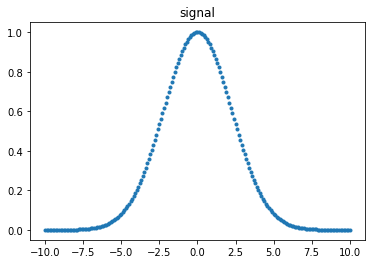

In [20]:
x = (np.arange(201)-100)/10
ccf = gaussian(x, 1, 0, 0.1)
plt.plot(x, ccf, '.')
plt.title('signal')

### Fourier transform of the signal

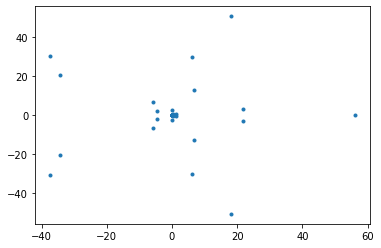

In [21]:
ft, power, phase, freq = FT(ccf, 0.1)
plt.plot(np.array(ft).real, np.array(ft).imag, '.')
plt.show()

### power spectrum

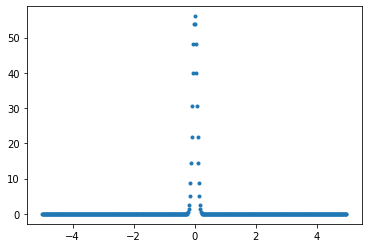

In [22]:
plt.plot(freq, power, '.')
plt.show()

### inverse Fourier transform

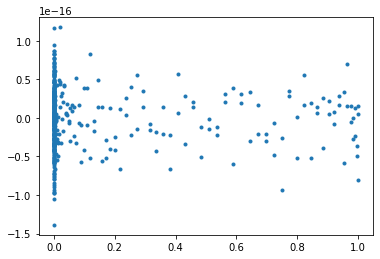

In [23]:
ift = np.fft.ifft(ft)
plt.plot(np.array(ift).real, np.array(ift).imag, '.')
plt.show()

Note the small imaginary part. Now take the absolute value.

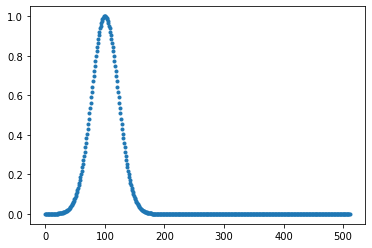

In [24]:
iccf = abs(ift)
plt.plot(iccf, '.') 
plt.show()

**Conclusion: padding does not add additional information**

## No Zero-padding

### power spectrum

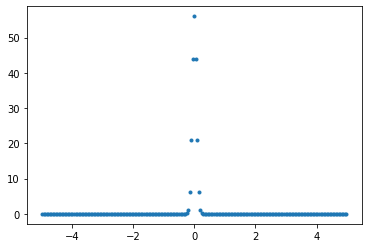

In [28]:
ft, power, phase, freq = FT2(ccf, 0.1)
plt.plot(freq, power, '.')
plt.show()

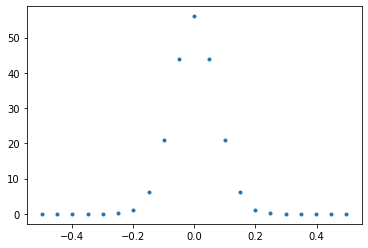

In [29]:
# Zoom-in
idx = abs(freq)<0.5
plt.plot(freq[idx], power[idx], '.')
plt.show()

### inverse Fourier transform

/Users/az/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


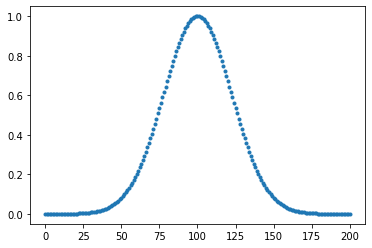

[4.53999298e-05+2.57835144e-19j 5.53961755e-05+2.43728440e-17j
 6.74583627e-05-2.74754079e-18j 8.19828893e-05-1.72296736e-17j
 9.94356357e-05-5.95961473e-18j 1.20362805e-04-1.12596152e-17j
 1.45403198e-04-1.17315776e-17j 1.75302063e-04+1.13328856e-17j
 2.10926674e-04-6.93789013e-18j 2.53283790e-04-2.11798787e-18j
 3.03539138e-04+5.94194807e-17j 3.63039106e-04+6.06897027e-19j
 4.33334765e-04+6.15508298e-17j 5.16208399e-04+5.29030967e-17j
 6.13702669e-04+2.07388609e-18j 7.28152539e-04+4.50988637e-17j
 8.62220086e-04+3.91471336e-17j 1.01893226e-03+8.14958448e-17j
 1.20172170e-03-8.00651090e-18j 1.41447053e-03+3.92247806e-17j
 1.66155727e-03+3.96916763e-17j 1.94790664e-03-2.48400552e-17j
 2.27904223e-03+6.92606715e-18j 2.66114180e-03-4.21800844e-17j
 3.10109501e-03+4.44458770e-17j 3.60656314e-03+1.25122634e-18j
 4.18604042e-03+2.46102318e-18j 4.84891651e-03+6.82493753e-17j
 5.60553935e-03-1.66954873e-17j 6.46727781e-03-4.96042109e-17j
 7.44658307e-03+1.40703823e-17j 8.55704807e-03+1.383370

In [30]:
ift = np.fft.ifft(ft)
plt.plot(ift, '.') 
plt.show()
print(ift)

Numerical error in the imaginary part.

### residuals

# Part 2 - test the cutoff